In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [4]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

feature scaling

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding="valid",activation="relu",input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units=10,activation="softmax")
])

2021-09-14 10:24:35.736531: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-14 10:24:35.739877: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-14 10:24:35.793769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-14 10:24:35.794430: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-14 10:24:35.794494: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-14 10:24:35.824427: I tensorflow/stream_executor/platform/def

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(x_val,y_val))

2021-09-14 10:24:47.953445: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-14 10:24:47.965174: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000200000 Hz


Epoch 1/20


2021-09-14 10:24:48.379546: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-14 10:24:49.165942: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-14 10:24:49.180886: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


94/94 [==============================] - 7s 9ms/step - loss: 0.9443 - accuracy: 0.6919 - val_loss: 0.4334 - val_accuracy: 0.8449
Epoch 2/20
94/94 [==============================] - 1s 6ms/step - loss: 0.4038 - accuracy: 0.8612 - val_loss: 0.3707 - val_accuracy: 0.8722
Epoch 3/20
94/94 [==============================] - 1s 8ms/step - loss: 0.3399 - accuracy: 0.8815 - val_loss: 0.3485 - val_accuracy: 0.8773
Epoch 4/20
94/94 [==============================] - 1s 7ms/step - loss: 0.3173 - accuracy: 0.8865 - val_loss: 0.3201 - val_accuracy: 0.8895
Epoch 5/20
94/94 [==============================] - 1s 6ms/step - loss: 0.3007 - accuracy: 0.8937 - val_loss: 0.3255 - val_accuracy: 0.8839
Epoch 6/20
94/94 [==============================] - 1s 6ms/step - loss: 0.2759 - accuracy: 0.8994 - val_loss: 0.2993 - val_accuracy: 0.8969
Epoch 7/20
94/94 [==============================] - 1s 7ms/step - loss: 0.2569 - accuracy: 0.9097 - val_loss: 0.2963 - val_accuracy: 0.8947
Epoch 8/20
94/94 [=============

In [12]:
y_pred = model.predict(x_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.02, 0.01, 0.  ]], dtype=float32)

In [13]:
model.evaluate(x_test,y_test) # ~ 91% accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.2638 - accuracy: 0.9069


[0.26378893852233887, 0.9068999886512756]

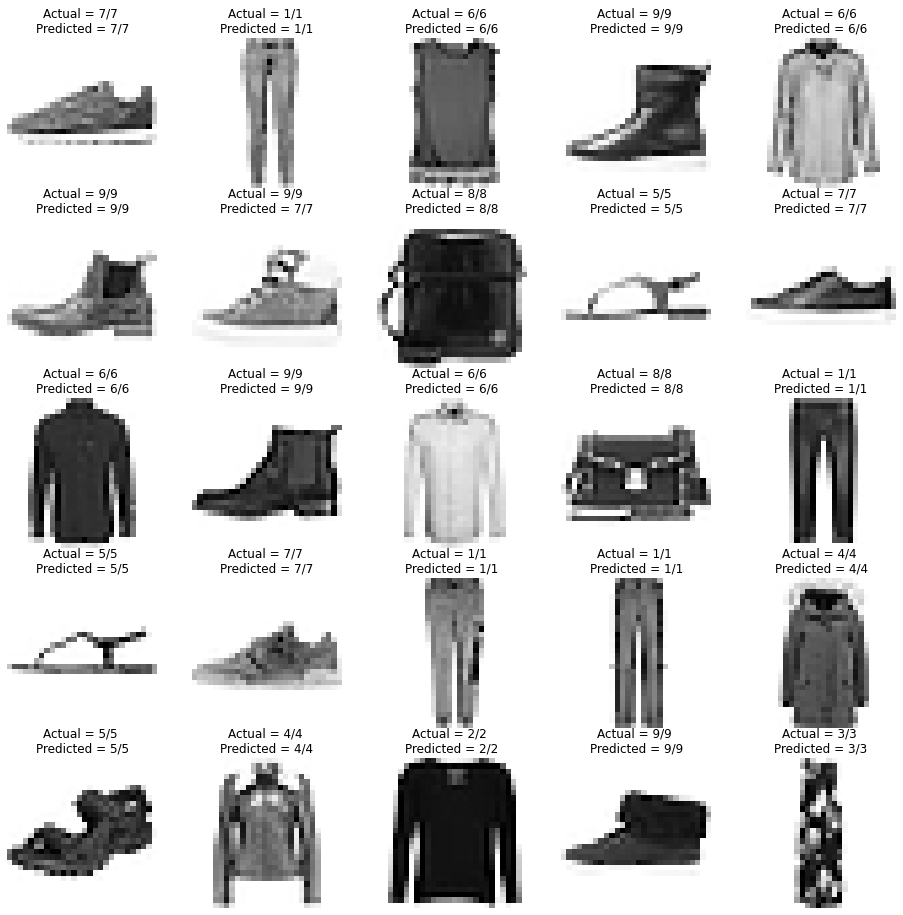

In [14]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(x_test[i].reshape(28,28),cmap='Greys')
    plt.title('Actual = {}/{} \nPredicted = {}/{}'.format(y_test[i],y_test[i],np.argmax(y_pred[i]),np.argmax(y_pred[i])))
    plt.axis('off')

In [17]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

In [24]:
model.save('fashion_mnist_cnn_model.h5')

# **Using complex Convolutional Neural Network**

In [25]:
x_train.shape

(48000, 28, 28, 1)

In [50]:
cnn_model2 = tf.keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

In [51]:
cnn_model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
cnn_model2.fit(x_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(x_val,y_val))

Epoch 1/20
94/94 [==============================] - 1s 8ms/step - loss: 1.1040 - accuracy: 0.6125 - val_loss: 0.4371 - val_accuracy: 0.8416
Epoch 2/20
94/94 [==============================] - 1s 6ms/step - loss: 0.4295 - accuracy: 0.8462 - val_loss: 0.3527 - val_accuracy: 0.8742
Epoch 3/20
94/94 [==============================] - 1s 6ms/step - loss: 0.3422 - accuracy: 0.8781 - val_loss: 0.3221 - val_accuracy: 0.8832
Epoch 4/20
94/94 [==============================] - 1s 6ms/step - loss: 0.3065 - accuracy: 0.8894 - val_loss: 0.2901 - val_accuracy: 0.8938
Epoch 5/20
94/94 [==============================] - 1s 6ms/step - loss: 0.2719 - accuracy: 0.9004 - val_loss: 0.2814 - val_accuracy: 0.8973
Epoch 6/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2554 - accuracy: 0.9055 - val_loss: 0.2666 - val_accuracy: 0.9036
Epoch 7/20
94/94 [==============================] - 1s 6ms/step - loss: 0.2369 - accuracy: 0.9109 - val_loss: 0.2582 - val_accuracy: 0.9068
Epoch 8/20
94/94 [==

In [53]:
y_pred = cnn_model2.predict(x_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.05, 0.  , 0.  ]], dtype=float32)

In [54]:
cnn_model2.evaluate(x_test,y_test) 

313/313 [==============================] - 1s 2ms/step - loss: 0.2576 - accuracy: 0.9175


[0.257638543844223, 0.9175000190734863]

In [55]:
cnn_model2.save('ANOTHER_MODEL.h5')